In [ ]:
%cd /content/Project_Python_For_AI/src/
!python main.py

/content/Project_Python_For_AI/src
=== AMAZON REVIEWS DATA PROCESSING PIPELINE ===
Configuration: {'train_size': 100000, 'test_size': 10000, 'tfidf_max_features': 5000, 'tfidf_min_df': 2, 'tfidf_max_df': 0.8, 'ngram_range': (1, 2)}

=== INITIALIZING DATA LOADER ===
Loaded: Train (100000, 2), Test (10000, 2)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!

=== TEXT PREPROCESSING ===
Processing training data...
Number of null values before processing:
label    0
input    0
dtype: int64

Number of null values after processing:
label    0
input    0
dtype: int64

Data types of columns:
label     int64
input    object
dtype: object
Number of records before removing duplicates: 100000
Number of records after removing duplicates: 100000
Processing test data...
Number of null values before processing:
label    0
in

In [ ]:
import pandas as pd
import io

data_str = """
n_topics  test_perplexity  train_perplexity  test_log_perplexity  train_log_perplexity  test_log_likelihood  train_log_likelihood  coherence_c_v  fit_seconds  vocab_size  n_train_docs
10      3191.393086       2172.429292             8.068213              7.683601        -3.146095e+06         -3.003766e+07       0.507508   570.775999       20000        100000
11      3255.381083       2216.270777             8.088065              7.703581        -3.153836e+06         -3.011577e+07       0.502863   575.618101       20000        100000
12      3295.079984       2210.721378             8.100186              7.701074        -3.158562e+06         -3.010597e+07       0.551308   557.731810       20000        100000
13      3397.894242       2267.370909             8.130911              7.726376        -3.170543e+06         -3.020488e+07       0.532746   583.373507       20000        100000
14      3478.259859       2297.538779             8.154287              7.739594        -3.179658e+06         -3.025656e+07       0.507011   601.409946       20000        100000
15      3506.423513       2321.640670             8.162352              7.750029        -3.182803e+06         -3.029735e+07       0.545186   585.102536       20000        100000
16      3609.871144       2374.620123             8.191427              7.772593        -3.194141e+06         -3.038556e+07       0.497765   630.736007       20000        100000
17      3643.499222       2407.388934             8.200700              7.786298        -3.197756e+06         -3.043914e+07       0.493435   599.716751       20000        100000
18      3692.204208       2424.387034             8.213979              7.793334        -3.202934e+06         -3.046664e+07       0.491691   655.474401       20000        100000
19      3725.678332       2435.362226             8.223004              7.797851        -3.206454e+06         -3.048430e+07       0.501484   664.371779       20000        100000
20      3879.741844       2518.359637             8.263524              7.831363        -3.222254e+06         -3.061531e+07       0.509892   696.074818       20000        100000
"""

# Đọc vào dataframe
lda_grid_df = pd.read_csv(io.StringIO(data_str), delim_whitespace=True)

print(lda_grid_df.head())


   n_topics  test_perplexity  train_perplexity  test_log_perplexity  \
0        10      3191.393086       2172.429292             8.068213   
1        11      3255.381083       2216.270777             8.088065   
2        12      3295.079984       2210.721378             8.100186   
3        13      3397.894242       2267.370909             8.130911   
4        14      3478.259859       2297.538779             8.154287   

   train_log_perplexity  test_log_likelihood  train_log_likelihood  \
0              7.683601           -3146095.0           -30037660.0   
1              7.703581           -3153836.0           -30115770.0   
2              7.701074           -3158562.0           -30105970.0   
3              7.726376           -3170543.0           -30204880.0   
4              7.739594           -3179658.0           -30256560.0   

   coherence_c_v  fit_seconds  vocab_size  n_train_docs  
0       0.507508   570.775999       20000        100000  
1       0.502863   575.618101       

/tmp/ipython-input-2685876210.py:21: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  lda_grid_df = pd.read_csv(io.StringIO(data_str), delim_whitespace=True)


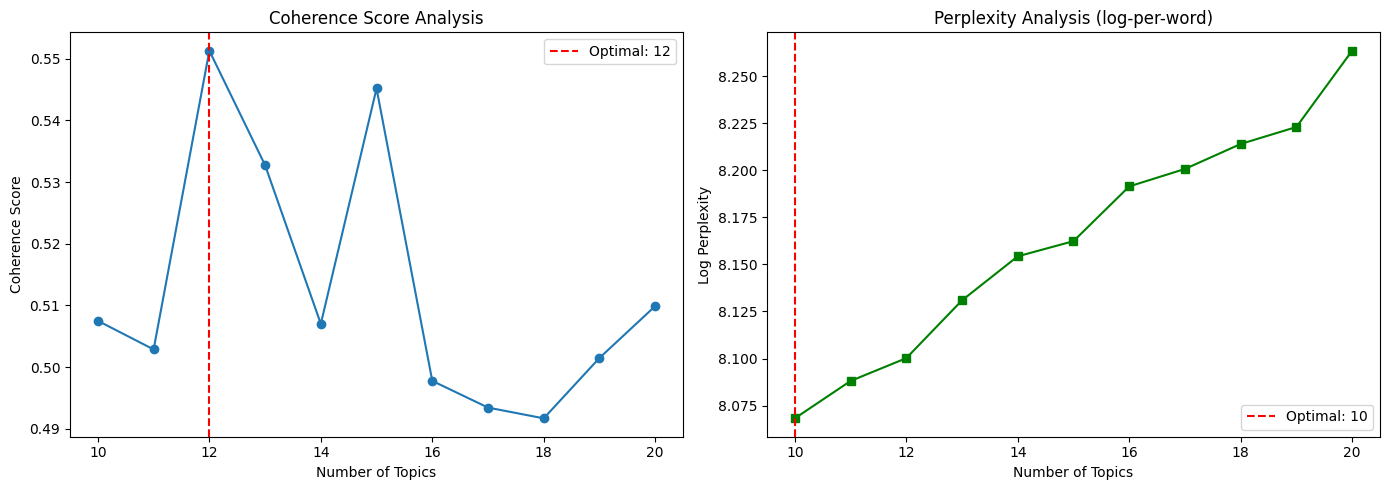

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

df = lda_grid_df.copy().sort_values("n_topics")
x = df["n_topics"].to_numpy()
coh = df["coherence_c_v"].to_numpy()
logppl = df["test_log_perplexity"].to_numpy()

# Best theo coherence và perplexity
best_coh_x = x[np.nanargmax(coh)]
best_ppl_x = x[np.argmin(logppl)]

plt.figure(figsize=(14, 5))

# Coherence
ax1 = plt.subplot(1, 2, 1)
ax1.plot(x, coh, marker="o")
ax1.axvline(best_coh_x, linestyle="--", color="red", label=f"Optimal: {int(best_coh_x)}")
ax1.set_title("Coherence Score Analysis")
ax1.set_xlabel("Number of Topics")
ax1.set_ylabel("Coherence Score")
ax1.legend()

# Perplexity
ax2 = plt.subplot(1, 2, 2)
ax2.plot(x, logppl, marker="s", color="green")
ax2.axvline(best_ppl_x, linestyle="--", color="red", label=f"Optimal: {int(best_ppl_x)}")
ax2.set_title("Perplexity Analysis (log-per-word)")
ax2.set_xlabel("Number of Topics")
ax2.set_ylabel("Log Perplexity")
ax2.legend()

plt.tight_layout()
plt.show()
